# SINGLE LEVEL PERCEPTRON

### -> Used for solving simple, linearly solvable problems.
### -> Can't solve complex problems.
### -> for eg. 1/0 , Yes/ No problems. (Problems with only two possibilities)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1]) # AND gate


In [3]:
def step_function(x):
    return np.where(x >= 0, 1, 0)


def train_perceptron(X, y, lr=0.1, epochs=10):
    n_samples, n_features = X.shape
    weights = np.random.randn(n_features)
    bias = np.random.randn()
    history = []  
    error_history = [] 

    for epoch in range(epochs):
        total_error = 0
        for xi, target in zip(X, y):
            z = np.dot(xi, weights) + bias
            yi = step_function(z)
            error = target - yi
            weights += lr * error * xi
            bias += lr * error
            total_error += abs(error)  
        
        history.append((weights.copy(), bias))
        error_history.append(total_error)
    
    return weights, bias, history, error_history

In [4]:
def predict(X, weights, bias):
    z = np.dot(X, weights) + bias
    return step_function(z)

In [5]:
weights, bias, history, error_history = train_perceptron(X, y, lr=0.1, epochs=20)

y_pred = predict(X, weights, bias)

In [6]:
print("Final Weights:", weights)
print("Final Bias:", bias)
print("Predictions:", y_pred)
print("Actual:", y)

Final Weights: [0.08843778 0.65565689]
Final Bias: -0.6065378391673619
Predictions: [0 1 0 1]
Actual: [0 0 0 1]


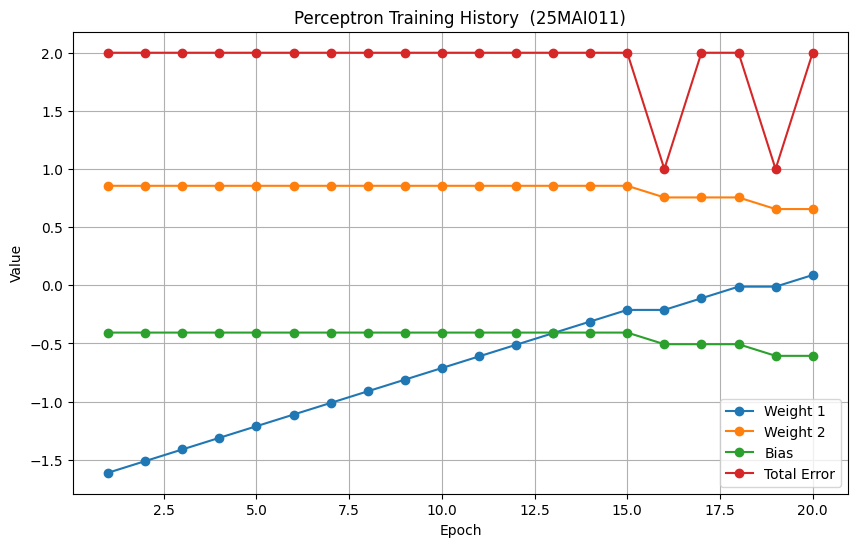

In [7]:
def plot_training_history(history, error_history):
    epochs = range(1, len(history) + 1)
    w1 = [w[0][0] for w in history]  
    w2 = [w[0][1] for w in history]  
    biases = [w[1] for w in history]

    plt.figure(figsize=(10, 6))
    plt.plot(epochs, w1, marker='o', label="Weight 1")
    plt.plot(epochs, w2, marker='o', label="Weight 2")
    plt.plot(epochs, biases, marker='o', label="Bias")
    plt.plot(epochs, error_history, marker='o', label="Total Error")
    plt.xlabel("Epoch")
    plt.ylabel("Value")
    plt.title("Perceptron Training History  (25MAI011)")
    plt.legend()
    plt.grid(True)
    plt.show()
    
plot_training_history(history, error_history)

In [8]:
def plot_decision_boundary(X, y, weights, bias):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    Z = predict(np.c_[xx.ravel(), yy.ravel()], weights, bias)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title("Perceptron Decision Boundary ")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.grid(True)
    plt.show()

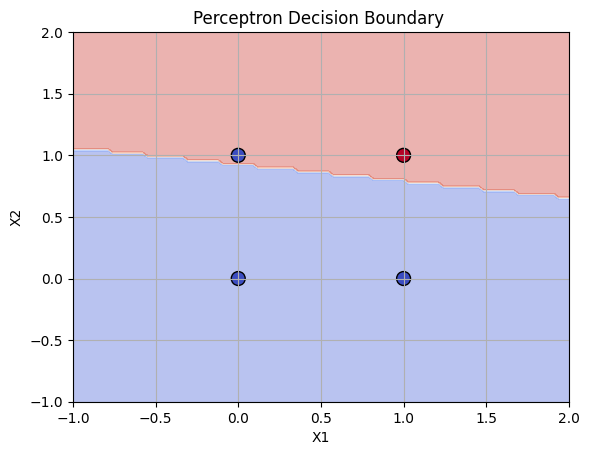

In [9]:
plot_decision_boundary(X, y, weights, bias)